<a href="https://colab.research.google.com/github/Vach-cmd/ML-2-programs/blob/main/ML2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1**

In [20]:
import csv
a = []
with open('enjoysport.csv', 'r') as csvfile:
    for row in csv.reader(csvfile):
        a.append(row)
print(a)
print("\n The total number of training instances are : ",len(a)-1)
num_attribute = len(a[0])-1
print("\n The initial hypothesis is : ")
hypothesis = ['0']*num_attribute
print(hypothesis)
for i in range(1, len(a)):
    if a[i][num_attribute] == 'yes':
        for j in range(0, num_attribute):
            if hypothesis[j] == '0' or hypothesis[j] == a[i][j]:
                hypothesis[j] = a[i][j]
            else:
                hypothesis[j] = '?'
    print("\n The hypothesis for the training instance {} is :\n".format(i),hypothesis)
print("\n The Maximally specific hypothesis for the training instance is ")
print(hypothesis)

[['sky', 'airtemp', 'humidity', 'wind', 'water', 'forcast', 'enjoysport'], ['sunny', 'warm', 'normal', 'strong', 'warm', 'same', 'yes'], ['sunny', 'warm', 'high', 'strong', 'warm', 'same', 'yes'], ['rainy', 'cold', 'high', 'strong', 'warm', 'change', 'no'], ['sunny', 'warm', 'high', 'strong', 'cool', 'change', 'yes']]

 The total number of training instances are :  4

 The initial hypothesis is : 
['0', '0', '0', '0', '0', '0']

 The hypothesis for the training instance 1 is :
 ['sunny', 'warm', 'normal', 'strong', 'warm', 'same']

 The hypothesis for the training instance 2 is :
 ['sunny', 'warm', '?', 'strong', 'warm', 'same']

 The hypothesis for the training instance 3 is :
 ['sunny', 'warm', '?', 'strong', 'warm', 'same']

 The hypothesis for the training instance 4 is :
 ['sunny', 'warm', '?', 'strong', '?', '?']

 The Maximally specific hypothesis for the training instance is 
['sunny', 'warm', '?', 'strong', '?', '?']


In [22]:
import numpy as np
import pandas as pd
data = pd.DataFrame(data=pd.read_csv('enjoysport.csv'))
concepts = np.array(data.iloc[:,0:-1])
print(concepts)
target = np.array(data.iloc[:,-1])
print(target)

def learn(concepts, target):
    specific_h = concepts[0].copy()
    print("initialization of specific_h and general_h")
    print(specific_h)
    general_h = [["?" for _ in range(len(specific_h))] for _ in range(len(specific_h))]
    print(general_h)

    for i, h in enumerate(concepts):
        if target[i] == "yes":
            for x in range(len(specific_h)):
                if h[x] != specific_h[x]:
                    specific_h[x] = '?'
                    general_h[x][x] = '?' # Fixed syntax error, assuming generalization to '?'
            print(f"\n Specific Hypothesis after training instance {i+1} (yes):\n", specific_h)

        elif target[i] == "no":
            for x in range(len(specific_h)):
                if h[x] != specific_h[x]:
                    general_h[x][x] = specific_h[x]
                else:
                    general_h[x][x] = '?'
            print(f"\n General Hypothesis after training instance {i+1} (no):")
            print(specific_h)
            print(general_h)

    # Filter out fully generalized hypotheses (all '?')
    general_h = [g for g in general_h if g != ['?', '?', '?', '?', '?', '?']]
    # Ensure G is not empty if all specific G hypotheses were fully generalized and thus removed.
    if not general_h:
        general_h = [['?' for _ in range(len(specific_h))]]

    return specific_h, general_h

s_final, g_final = learn(concepts, target)
print("Final Specific_h:", s_final, sep="\n")
print("Final General_h:", g_final, sep="\n")

[['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
 ['sunny' 'warm' 'high' 'strong' 'warm' 'same']
 ['rainy' 'cold' 'high' 'strong' 'warm' 'change']
 ['sunny' 'warm' 'high' 'strong' 'cool' 'change']]
['yes' 'yes' 'no' 'yes']
initialization of specific_h and general_h
['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

 Specific Hypothesis after training instance 1 (yes):
 ['sunny' 'warm' 'normal' 'strong' 'warm' 'same']

 Specific Hypothesis after training instance 2 (yes):
 ['sunny' 'warm' '?' 'strong' 'warm' 'same']

 General Hypothesis after training instance 3 (no):
['sunny' 'warm' '?' 'strong' 'warm' 'same']
[['sunny', '?', '?', '?', '?', '?'], ['?', 'warm', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', 

**2**

In [4]:

import pandas as pd
import math
# Step 1: Create DataFrame from the table
data = {
 "S.No": [1, 2, 3, 4, 5],
 "CGPA": [">=9", "<8", ">=9", "<8", ">=8"],
 "Interactiveness": ["Yes", "Yes", "Yes", "No", "Yes"],
 "Practical Knowledge": ["Good", "Good", "Average", "Good", "Good"],
 "Job Offer": ["Yes", "Yes", "No", "No", "No"]
}
df = pd.DataFrame(data)
# Step 2: Helper functions
def foil_gain(pos, neg, new_pos, new_neg):
 """Calculate FOIL gain"""
 if new_pos == 0:
  return 0
 gain = new_pos * (math.log2(new_pos / (new_pos + new_neg)) - math.log2(pos / (pos + neg)))
 return gain
# Step 3: Count total positives and negatives
total_pos = len(df[df["Job Offer"] == "Yes"])
total_neg = len(df[df["Job Offer"] == "No"])
# Step 4: Generate candidate literals and calculate FOIL Gain
attributes = ["CGPA", "Interactiveness", "Practical Knowledge"]
values = {
 "CGPA": df["CGPA"].unique(),
 "Interactiveness": df["Interactiveness"].unique(),
 "Practical Knowledge": df["Practical Knowledge"].unique()
}
gains = []
for attr in attributes:
 for val in values[attr]:
  subset = df[df[attr] == val]
  new_pos = len(subset[subset["Job Offer"] == "Yes"])
  new_neg = len(subset[subset["Job Offer"] == "No"])
  gain = foil_gain(total_pos, total_neg, new_pos, new_neg)
  gains.append((f"{attr} = {val}", gain, new_pos, new_neg))
# Step 5: Sort by FOIL Gain
gains.sort(key=lambda x: x[1], reverse=True)
# Step 6: Output top rules
print("FOIL Gain and Rule Candidates:\n")
for rule, gain, pos, neg in gains:
 print(f"Rule: IF {rule} THEN Job Offer = Yes | FOIL Gain = {gain:.4f} | Positives = {pos} | Negatives\n= {neg}")

FOIL Gain and Rule Candidates:

Rule: IF Interactiveness = Yes THEN Job Offer = Yes | FOIL Gain = 0.6439 | Positives = 2 | Negatives
= 2
Rule: IF Practical Knowledge = Good THEN Job Offer = Yes | FOIL Gain = 0.6439 | Positives = 2 | Negatives
= 2
Rule: IF CGPA = >=9 THEN Job Offer = Yes | FOIL Gain = 0.3219 | Positives = 1 | Negatives
= 1
Rule: IF CGPA = <8 THEN Job Offer = Yes | FOIL Gain = 0.3219 | Positives = 1 | Negatives
= 1
Rule: IF CGPA = >=8 THEN Job Offer = Yes | FOIL Gain = 0.0000 | Positives = 0 | Negatives
= 1
Rule: IF Interactiveness = No THEN Job Offer = Yes | FOIL Gain = 0.0000 | Positives = 0 | Negatives
= 1
Rule: IF Practical Knowledge = Average THEN Job Offer = Yes | FOIL Gain = 0.0000 | Positives = 0 | Negatives
= 1


**3**

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_breast_cancer

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Bagging with Decision Tree
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_model = BaggingClassifier(
 estimator=DecisionTreeClassifier(),
 n_estimators=50,
 random_state=42
)
bag_model.fit(X_train, y_train)
y_pred_bag = bag_model.predict(X_test)
# Evaluation
print("Bagging Accuracy:", accuracy_score(y_test, y_pred_bag))
print("\n Classification Report:\n", classification_report(y_test, y_pred_bag))
print("\n Bagging Accuracy:", accuracy_score(y_test, y_pred_bag))
print("\nClassification Report:\n", classification_report(y_test, y_pred_bag))
#Boosting with AdaBoost
from sklearn.ensemble import AdaBoostClassifier
# AdaBoost with Decision Tree
boost_model = AdaBoostClassifier(
 estimator=DecisionTreeClassifier(max_depth=1),
 n_estimators=50,
 random_state=42
)
boost_model.fit(X_train, y_train)
y_pred_boost = boost_model.predict(X_test)
# Evaluation
print(" Boosting Accuracy:", accuracy_score(y_test, y_pred_boost))
print("\n Classification Report:\n", classification_report(y_test, y_pred_boost))

Bagging Accuracy: 0.9590643274853801

 Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94        63
           1       0.96      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171


 Bagging Accuracy: 0.9590643274853801

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94        63
           1       0.96      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

 Boosting Accuracy: 0.9707602339181286

 Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.98      0.97      0.98  

**4**

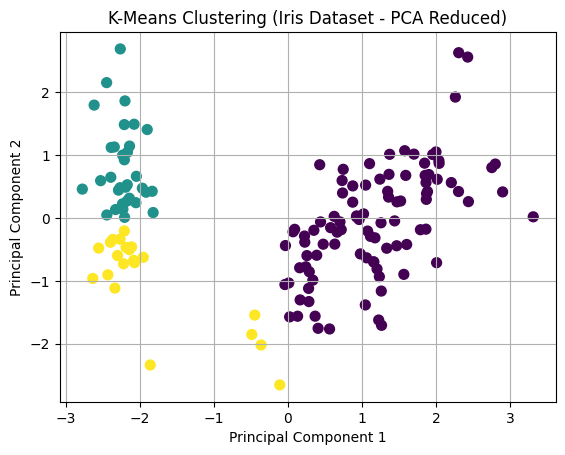

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Load iris dataset
iris = datasets.load_iris()
X = iris.data # We ignore the target (unsupervised)
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Optional: Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_
# Add labels to DataFrame
df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df['Cluster'] = labels
# Visualize Clusters
plt.scatter(df['PC1'], df['PC2'], c=df['Cluster'], cmap='viridis', s=50)
plt.title("K-Means Clustering (Iris Dataset - PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


**5**

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.5-py3-none-any.whl size=12031 sha256=b61a9bc017219f8bb4aaf444178bada15f7cf5dae09f4d6002a9702a53cbcbbf
  Stored in directory: /root/.cache/pip/wheels/0f/8c/a4/5b7aa56fa6ef11d536d45da775bcc5a2a1c163ff0f8f11990b
Successfully built minisom
Dataset Head:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  Species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  
Training SOM...
Training Complete!


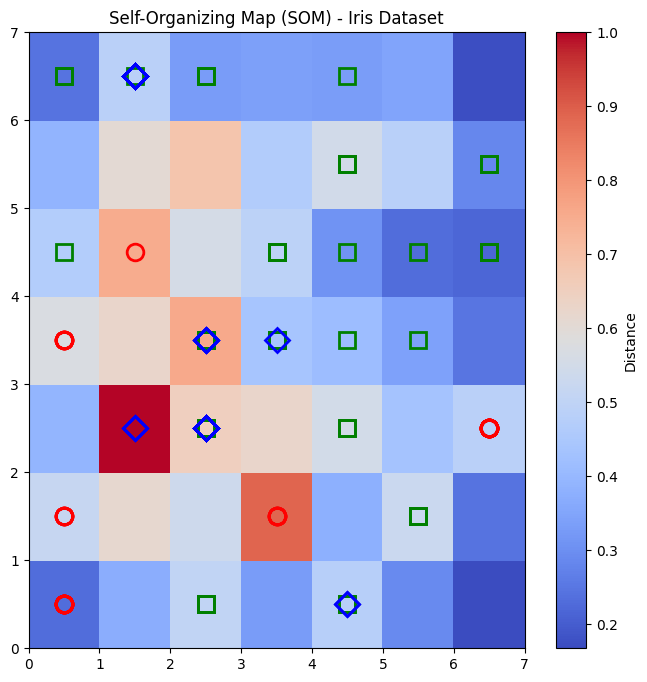


Clustered Data:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  Species Cluster  
0  setosa  (0, 0)  
1  setosa  (6, 2)  
2  setosa  (6, 2)  
3  setosa  (6, 2)  
4  setosa  (0, 1)  
Clustered data saved to 'iris_som_clustered.csv'


In [10]:
!pip install minisom
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data # Features
y = iris.target # Target classes
target_names = iris.target_names
data = pd.DataFrame(X, columns=iris.feature_names)
data['Species'] = [target_names[i] for i in y]
print("Dataset Head:")
print(data.head())
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
som_x, som_y = 7, 7 # Grid size
som = MiniSom(x=som_x, y=som_y, input_len=X_scaled.shape[1], sigma=1.0,
learning_rate=0.5)
som.random_weights_init(X_scaled)
print("Training SOM...")
som.train_random(data=X_scaled, num_iteration=100)
print("Training Complete!")
plt.figure(figsize=(8, 8))
plt.pcolor(som.distance_map().T, cmap='coolwarm') # Distance map
plt.colorbar(label='Distance')
markers = ['o', 's', 'D']
colors = ['r', 'g', 'b']
for i, x in enumerate(X_scaled):
 w = som.winner(x)
 plt.plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]],
 markerfacecolor='None', markeredgecolor=colors[y[i]],
 markersize=12, markeredgewidth=2)
plt.title("Self-Organizing Map (SOM) - Iris Dataset")
plt.show()
clusters = [som.winner(x) for x in X_scaled]
data['Cluster'] = clusters
print("\nClustered Data:")
print(data.head())
data.to_csv("iris_som_clustered.csv", index=False)
print("Clustered data saved to 'iris_som_clustered.csv'")

**6**

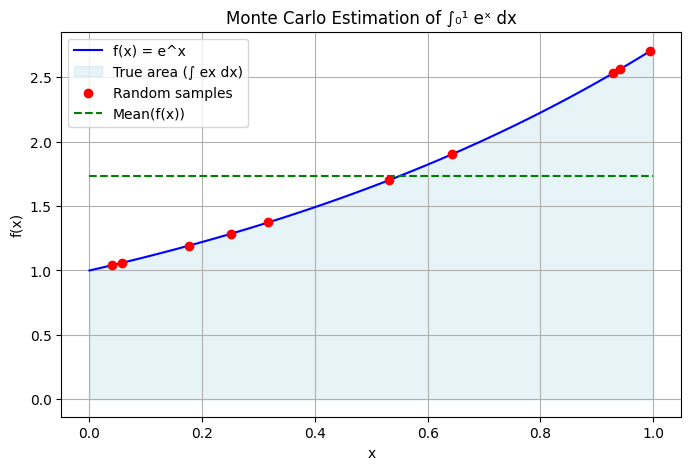

Monte Carlo estimated integral = 1.73527395080724
True integral value = 1.718281828459045
Absolute error = 0.016992122348194805


In [12]:
import numpy as np
import matplotlib.pyplot as plt
# Step 1: Generate uniform random samples in [0,1]
def uniform_random(n):
 return np.random.rand(n)
# Step 2: Define the function
def f(x):
 return np.exp(x)
# Step 3: Generate 10 samples
n = 10
x_samples = uniform_random(n)
f_samples = f(x_samples)
# Step 4: Monte Carlo estimate
I_estimated = np.mean(f_samples)
I_true = np.e - 1
# Step 5: Plot
x = np.linspace(0, 1, 100)
y = f(x)
plt.figure(figsize=(8,5))
plt.plot(x, y, 'b-', label='f(x) = e^x')
plt.fill_between(x, y, color='lightblue', alpha=0.3, label='True area (∫ ex dx)')
plt.scatter(x_samples, f_samples, color='red', zorder=5, label='Random samples')
plt.hlines(np.mean(f_samples), 0, 1, colors='green', linestyles='--', label='Mean(f(x))')
plt.title('Monte Carlo Estimation of ∫₀¹ eˣ dx')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()
print("Monte Carlo estimated integral =", I_estimated)
print("True integral value =", I_true)
print("Absolute error =", abs(I_estimated - I_true))

**7**

In [14]:
!pip install pgmpy
import pandas as pd
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
# Step 1: Create dataset
data = pd.DataFrame(
    {
        'Weather': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny',
                    'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
        'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild',
                        'Mild', 'Hot', 'Mild'],
        'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal',
                     'Normal', 'Normal', 'High', 'Normal', 'High'],
        'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak',
                 'Strong', 'Strong', 'Weak', 'Strong'],
        'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
    }
)
# Step 2: Define Bayesian Network structure
model = DiscreteBayesianNetwork([
    ('Weather', 'Play'),
    ('Temperature', 'Play'),
    ('Humidity', 'Play'),
    ('Wind', 'Play')
])
# Step 3: Train the model using Maximum Likelihood Estimation
model.fit(data, estimator=MaximumLikelihoodEstimator)
# Step 4: Create inference object
inference = VariableElimination(model)
# Step 5: Compute likelihood of an event
# Query: Likelihood of Play when Weather=Sunny
result = inference.query(variables=['Play'], evidence={'Weather': 'Sunny'})
print("Likelihood of Play when Weather is Sunny:\n", result)
# Example: What is the probability of playing if Weather=Rain and Humidity=High?
query_result = inference.query(
    variables=['Play'],
    evidence={'Weather': 'Rain', 'Humidity': 'High'}
)
print("=== Likelihood of Event === if Weather = Rain and Humidity = High")
print(query_result)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 45.5 MB/s eta 0:00:00
Likelihood of Play when Weather is Sunny:
 +-----------+-------------+
| Play      |   phi(Play) |
+===========+=============+
| Play(No)  |      0.5459 |
+-----------+-------------+
| Play(Yes) |      0.4541 |
+-----------+-------------+
=== Likelihood of Event === if Weather = Rain and Humidity = High
+-----------+-------------+
| Play      |   phi(Play) |
+===========+=============+
| Play(No)  |      0.4694 |
+-----------+-------------+
| Play(Yes) |      0.5306 |
+-----------+-------------+


**8**

In [16]:
import pandas as pd
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
data = pd.DataFrame({
 'Weather': ['Sunny','Sunny','Overcast','Rain','Rain','Rain','Overcast','Sunny','Sunny',
 'Rain','Sunny','Overcast','Overcast','Rain'],
 'Temperature': ['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool',
 'Mild','Mild','Mild','Hot','Mild'],
 'Humidity': ['High','High','High','High','Normal','Normal','Normal','High','Normal',
 'Normal','Normal','High','Normal','High'],
 'Wind': ['Weak','Strong','Weak','Weak','Weak','Strong','Strong','Weak','Weak',
 'Weak','Strong','Strong','Weak','Strong'],
 'Play': ['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']
})
model = DiscreteBayesianNetwork([
 ('Weather', 'Play'),
 ('Temperature', 'Play'),
 ('Humidity', 'Play'),
 ('Wind', 'Play')
])
model.fit(data, estimator=MaximumLikelihoodEstimator)
inference = VariableElimination(model)
# Step 5: Query multiple inferences
queries = [
 {'Weather': 'Sunny', 'Humidity': 'High'},
 {'Weather': 'Rain', 'Wind': 'Weak'},
 {'Weather': 'Overcast'}
]
print("\n--- Inferences Based on Given Conditions ---")
for evidence in queries:
 prob = inference.query(variables=['Play'], evidence=evidence)
 print(f"\nEvidence: {evidence}")
 print(prob)


--- Inferences Based on Given Conditions ---

Evidence: {'Weather': 'Sunny', 'Humidity': 'High'}
+-----------+-------------+
| Play      |   phi(Play) |
+===========+=============+
| Play(No)  |      0.7653 |
+-----------+-------------+
| Play(Yes) |      0.2347 |
+-----------+-------------+

Evidence: {'Weather': 'Rain', 'Wind': 'Weak'}
+-----------+-------------+
| Play      |   phi(Play) |
+===========+=============+
| Play(No)  |      0.2143 |
+-----------+-------------+
| Play(Yes) |      0.7857 |
+-----------+-------------+

Evidence: {'Weather': 'Overcast'}
+-----------+-------------+
| Play      |   phi(Play) |
+===========+=============+
| Play(No)  |      0.3418 |
+-----------+-------------+
| Play(Yes) |      0.6582 |
+-----------+-------------+
